### Try K-fold CV

In [97]:
import numpy as np
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [98]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
pd.set_option('display.min_rows', 50)

In [99]:
file = '../data/home_sale_data_324_features_5_class.csv'

data = pd.read_csv(file)

'''suffle rows randomly'''
data = data.sample(frac=1)

labels = data['label']

data.head()

,OverallQual,GrLivArea,TotalSF,GarageCars,Total_Bathrooms,GarageArea,YrBltAndRemod,TotalBsmtSF,1stFlrSF,YearBuilt,FullBath,YearRemodAdd,Foundation_PConc,TotRmsAbvGrd,hasfireplace,ExterQual_Gd,BsmtQual_Ex,Fireplaces,HeatingQC_Ex,MasVnrArea,Total_porch_sf,BsmtFinType1_GLQ,KitchenQual_Ex,OpenPorchSF,GarageFinish_Fin,...,BsmtExposure_No,Neighborhood_OldTown,Foundation_BrkTil,GarageFinish_None,GarageCond_None,GarageQual_None,GarageType_None,MSSubClass_30,LotShape_Reg,PavedDrive_N,Foundation_CBlock,MSZoning_RM,HeatingQC_TA,CentralAir_N,GarageType_Detchd,MasVnrType_None,GarageFinish_Unf,BsmtQual_TA,FireplaceQu_None,KitchenQual_TA,ExterQual_TA,dummy_1,dummy_2,dummy_3,label
1522,0.555556,0.534411,0.282095,0.4,0.163872,0.295699,0.615789,0.435122,0.585973,0.659420,0.25,0.566667,0.0,0.600315,1.0,0.0,0.0,0.293793,0.0,0.406188,0.861892,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,p3
1716,0.666667,0.549418,0.293213,0.6,0.164976,0.529570,0.984211,0.452277,0.601852,0.985507,0.50,0.983333,1.0,0.516936,0.0,1.0,0.0,0.000000,1.0,0.329526,0.098585,0.0,0.0,0.358734,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,p2
849,0.444444,0.629267,0.356484,0.4,0.251426,0.305108,0.521053,0.549906,0.685845,0.601449,0.25,0.400000,0.0,0.516936,1.0,0.0,0.0,0.293793,0.0,0.000000,0.413114,0.0,0.0,0.758667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,p4
83,0.666667,0.555798,0.239177,0.4,0.252530,0.268817,0.847368,0.119775,0.359823,0.891304,0.50,0.766667,1.0,0.600315,1.0,0.0,0.0,0.293793,0.0,0.128562,0.288829,0.0,0.0,0.314107,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,p4
708,0.333333,0.390888,0.194144,0.4,0.163872,0.387097,0.578947,0.299439,0.432570,0.710145,0.25,0.333333,0.0,0.516936,0.0,0.0,0.0,0.000000,0.0,0.351144,0.173856,0.0,0.0,0.632630,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,p7


In [100]:
# drop label column
data.drop(['label'], axis=1, inplace=True)
data.describe()

,OverallQual,GrLivArea,TotalSF,GarageCars,Total_Bathrooms,GarageArea,YrBltAndRemod,TotalBsmtSF,1stFlrSF,YearBuilt,FullBath,YearRemodAdd,Foundation_PConc,TotRmsAbvGrd,hasfireplace,ExterQual_Gd,BsmtQual_Ex,Fireplaces,HeatingQC_Ex,MasVnrArea,Total_porch_sf,BsmtFinType1_GLQ,KitchenQual_Ex,OpenPorchSF,GarageFinish_Fin,...,Neighborhood_IDOTRR,BsmtExposure_No,Neighborhood_OldTown,Foundation_BrkTil,GarageFinish_None,GarageCond_None,GarageQual_None,GarageType_None,MSSubClass_30,LotShape_Reg,PavedDrive_N,Foundation_CBlock,MSZoning_RM,HeatingQC_TA,CentralAir_N,GarageType_Detchd,MasVnrType_None,GarageFinish_Unf,BsmtQual_TA,FireplaceQu_None,KitchenQual_TA,ExterQual_TA,dummy_1,dummy_2,dummy_3
count,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,...,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.0,2911.0,2911.0
mean,0.565136,0.542763,0.293431,0.353143,0.200863,0.317285,0.660811,0.326706,0.487996,0.719569,0.391876,0.570892,0.447956,0.542786,0.512882,0.335967,0.087255,0.171718,0.511508,0.159954,0.203170,0.290622,0.069392,0.176542,0.245620,...,0.031261,0.652697,0.082102,0.106493,0.054277,0.054277,0.054277,0.053590,0.047750,0.637582,0.073514,0.423222,0.158708,0.293370,0.066644,0.266919,0.605634,0.421848,0.439368,0.487118,0.511852,0.616627,0.0,0.0,0.0
std,0.155988,0.125193,0.119772,0.152244,0.133043,0.143976,0.242686,0.131930,0.131369,0.219351,0.138140,0.348189,0.497369,0.128554,0.499920,0.472409,0.282257,0.181727,0.499953,0.218350,0.163524,0.454127,0.254163,0.183129,0.430528,...,0.174051,0.476195,0.274568,0.308520,0.226602,0.226602,0.226602,0.225245,0.213273,0.480781,0.261024,0.494155,0.365467,0.455385,0.249447,0.442425,0.488798,0.493939,0.496395,0.499920,0.499945,0.486292,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,0.444444,0.451636,0.213557,0.200000,0.088659,0.215054,0.473684,0.247193,0.395003,0.590580,0.250000,0.250000,0.000000,0.421336,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066964,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
50%,0.555556,0.547807,0.282326,0.400000,0.164976,0.322581,0.652632,0.308172,0.481664,0.731884,0.500000,0.716667,0.000000,0.516936,1.000000,0.000000,0.000000,0.293793,1.000000,0.000000,0.179849,0.000000,0.000000,0.180865,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.0,0.0
75%,0.666667,0.621247,0.356447,0.400000,0.252530,0.387097,0.905263,0.405490,0.582574,0.934783,0.500000,0.900000,1.000000,0.600315,1.000000,1.000000,0.000000,0.293793,1.000000,0.353218,0.327089,1.000000,0.000000,0.309510,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,

In [101]:
labels.unique()

array(['p3', 'p2', 'p4', 'p7', 'p9', 'p1', 'p6', 'p5', 'p8', 'p0'],
      dtype=object)

In [102]:
'''one-hot encode the labels'''

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
# print(list(integer_encoded))

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
labels = onehot_encoder.fit_transform(integer_encoded)

print('Number of classes: ', len(labels[0]))
print(labels)

Number of classes:  10
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [103]:
data_np = data.to_numpy()
data_np.shape
data_np = data_np.reshape(len(data), 18, 18)
data_np.shape

(2911, 18, 18)

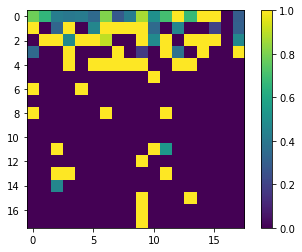

In [104]:
# data_np[0].shape

nArray = np.array(data_np[99])


a11=nArray.reshape(18,18)
plt.imshow(a11)
plt.colorbar()
plt.show()

In [105]:
labels.shape

(2911, 10)

In [106]:
train_examples = data_np
train_examples.shape

(2911, 18, 18)

#### train test splitting
- hold out 15% for testing
- use 85% to train model with K-fold CV

In [107]:
ttl_samples = train_examples.shape[0] 
test_ratio = 0.15
test_samples = int(test_ratio * train_examples.shape[0])

test_examples = train_examples[-1*test_samples:]
train_examples = train_examples[:-1*test_samples]
test_labels = labels[-1*test_samples:]
train_labels = labels[:-1*test_samples]


In [108]:
print('train: ', train_examples.shape)
print('test: ', test_examples.shape)

train:  (2475, 18, 18)
test:  (436, 18, 18)


In [109]:
trainX = train_examples.reshape(ttl_samples-test_samples, 18,18,1)
trainY = train_labels

testX = test_examples.reshape(test_samples, 18,18,1)
testY = test_labels


### Prepare model

In [110]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')


def create_model(num_classes=5, lr=0.005):

	# Working
	with tf.device('/cpu:0'):
		data_augmentation = tf.keras.Sequential([ 
			tf.keras.layers.RandomFlip("horizontal", input_shape=(18, 18, 1)),
	  		tf.keras.layers.RandomRotation(0.1),
		    tf.keras.layers.RandomZoom(0.1)
			])


	model = tf.keras.Sequential([
		# data_augmentation,
	  	# tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
	  	tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(18, 18, 1)),
		tf.keras.layers.MaxPooling2D((2, 2)),
		tf.keras.layers.Dropout(0.1),
		tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
	  	tf.keras.layers.MaxPooling2D((2,2)),
		tf.keras.layers.Dropout(0.1),
	  	tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
	  	tf.keras.layers.MaxPooling2D(),
		tf.keras.layers.Dropout(0.1),
		tf.keras.layers.Flatten(),
		tf.keras.layers.Dense(128, activation='relu'),
		tf.keras.layers.Dense(num_classes, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.0001))
	])

	# opt = tf.keras.optimizers.SGD(lr=0.005, momentum=0.9)
	opt = tf.keras.optimizers.Adam(lr=lr)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

	return model


Num GPUs Available:  1


In [111]:
# model.summary()

### Training

In [112]:
from sklearn.model_selection import KFold

# modify to save ckpt for each test
ckpt_path = "./ckpt/10_class_lr0005/val_acc_{val_accuracy:.3f}.hdf5"

# training params
epochs = 120
num_classes = 10
lr = 0.0005

# the k for k fold CV
n_split = 10

# for recording best performance
max_acc = 0
best_history = None

'''
k-fold cross validation
Save the best model using validation accuracy as metric
Print the global best performace when finished
'''
for train_index,test_index in KFold(n_split).split(train_examples):

    x_train, x_vad = train_examples[train_index], train_examples[test_index]
    y_train, y_vad = labels[train_index], labels[test_index]

    model=create_model(num_classes, lr)
  
    # callbacks
    checkpoint_filepath = ckpt_path
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=True,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True,
        verbose=1
    )

    early_stopping_callback = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        verbose=1,
        mode='auto',
    )

    # Model weights are saved at the end of every epoch, if it's the best seen so far.
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_vad, y_vad),
                        callbacks=[model_checkpoint_callback, early_stopping_callback])

    val_acc = max(history.history['val_accuracy'])
    
    if val_acc > max_acc:
        max_acc = val_acc
        best_history = history
        # print('Best acc so far. Saving params...\n')

print('Finish {}-fold cross validation'.format(n_split))
print('Best performing model has {:.4f} validation accuracy'.format(max_acc))

#CPU
# with tf.device('/CPU:0'):
#     history = model.fit(trainX, trainY, epochs=epochs,validation_data=(testX, testY), batch_size=64)

# deafult go with GPU
# history = model.fit(trainX, trainY, epochs=epochs,validation_data=(testX, testY), batch_size=64)

Epoch 1/120


/Users/evantilu/miniforge3/envs/6998_DL_tf/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-04-23 21:55:21.696838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 2.2677 - accuracy: 0.1370
Epoch 1: val_accuracy improved from -inf to 0.22581, saving model to ./ckpt/10_class_lr0005/val_acc_0.226.hdf5
70/70 [==============================] - 2s 21ms/step - loss: 2.2677 - accuracy: 0.1370 - val_loss: 2.1577 - val_accuracy: 0.2258
Epoch 2/120


2022-04-23 21:55:23.260058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


68/70 [============================>.] - ETA: 0s - loss: 1.8920 - accuracy: 0.2698
Epoch 2: val_accuracy improved from 0.22581 to 0.26613, saving model to ./ckpt/10_class_lr0005/val_acc_0.266.hdf5
70/70 [==============================] - 1s 16ms/step - loss: 1.8901 - accuracy: 0.2699 - val_loss: 1.7392 - val_accuracy: 0.2661
Epoch 3/120
70/70 [==============================] - ETA: 0s - loss: 1.6651 - accuracy: 0.3368
Epoch 3: val_accuracy improved from 0.26613 to 0.27016, saving model to ./ckpt/10_class_lr0005/val_acc_0.270.hdf5
70/70 [==============================] - 1s 15ms/step - loss: 1.6651 - accuracy: 0.3368 - val_loss: 1.7149 - val_accuracy: 0.2702
Epoch 4/120
69/70 [============================>.] - ETA: 0s - loss: 1.5935 - accuracy: 0.3428
Epoch 4: val_accuracy improved from 0.27016 to 0.34274, saving model to ./ckpt/10_class_lr0005/val_acc_0.343.hdf5
70/70 [==============================] - 1s 15ms/step - loss: 1.5924 - accuracy: 0.3444 - val_loss: 1.6257 - val_accuracy: 0.

2022-04-23 21:56:09.731797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 2.2612 - accuracy: 0.1486
Epoch 1: val_accuracy improved from -inf to 0.20968, saving model to ./ckpt/10_class_lr0005/val_acc_0.210.hdf5
70/70 [==============================] - 2s 19ms/step - loss: 2.2612 - accuracy: 0.1486 - val_loss: 2.1470 - val_accuracy: 0.2097
Epoch 2/120
 1/70 [..............................] - ETA: 1s - loss: 2.1944 - accuracy: 0.1875

2022-04-23 21:56:11.050394: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


69/70 [============================>.] - ETA: 0s - loss: 1.8849 - accuracy: 0.2649
Epoch 2: val_accuracy improved from 0.20968 to 0.33871, saving model to ./ckpt/10_class_lr0005/val_acc_0.339.hdf5
70/70 [==============================] - 1s 15ms/step - loss: 1.8828 - accuracy: 0.2667 - val_loss: 1.7181 - val_accuracy: 0.3387
Epoch 3/120
69/70 [============================>.] - ETA: 0s - loss: 1.6659 - accuracy: 0.3320
Epoch 3: val_accuracy did not improve from 0.33871
70/70 [==============================] - 1s 15ms/step - loss: 1.6668 - accuracy: 0.3309 - val_loss: 1.6563 - val_accuracy: 0.3185
Epoch 4/120
69/70 [============================>.] - ETA: 0s - loss: 1.5950 - accuracy: 0.3483
Epoch 4: val_accuracy improved from 0.33871 to 0.36694, saving model to ./ckpt/10_class_lr0005/val_acc_0.367.hdf5
70/70 [==============================] - 1s 15ms/step - loss: 1.5961 - accuracy: 0.3476 - val_loss: 1.5775 - val_accuracy: 0.3669
Epoch 5/120
70/70 [==============================] - ETA: 

2022-04-23 21:57:06.850321: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 2.2568 - accuracy: 0.1522
Epoch 1: val_accuracy improved from -inf to 0.28226, saving model to ./ckpt/10_class_lr0005/val_acc_0.282.hdf5
70/70 [==============================] - 2s 19ms/step - loss: 2.2568 - accuracy: 0.1522 - val_loss: 2.0799 - val_accuracy: 0.2823
Epoch 2/120


2022-04-23 21:57:08.168480: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


69/70 [============================>.] - ETA: 0s - loss: 1.8929 - accuracy: 0.2708
Epoch 2: val_accuracy improved from 0.28226 to 0.33871, saving model to ./ckpt/10_class_lr0005/val_acc_0.339.hdf5
70/70 [==============================] - 1s 15ms/step - loss: 1.8906 - accuracy: 0.2721 - val_loss: 1.6425 - val_accuracy: 0.3387
Epoch 3/120
68/70 [============================>.] - ETA: 0s - loss: 1.6962 - accuracy: 0.3065
Epoch 3: val_accuracy improved from 0.33871 to 0.37903, saving model to ./ckpt/10_class_lr0005/val_acc_0.379.hdf5
70/70 [==============================] - 1s 15ms/step - loss: 1.6957 - accuracy: 0.3053 - val_loss: 1.5513 - val_accuracy: 0.3790
Epoch 4/120
67/70 [===========================>..] - ETA: 0s - loss: 1.6269 - accuracy: 0.3307
Epoch 4: val_accuracy did not improve from 0.37903
70/70 [==============================] - 1s 15ms/step - loss: 1.6217 - accuracy: 0.3336 - val_loss: 1.5693 - val_accuracy: 0.3508
Epoch 5/120
67/70 [===========================>..] - ETA: 

2022-04-23 21:57:45.031829: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 2.2750 - accuracy: 0.1545
Epoch 1: val_accuracy improved from -inf to 0.18952, saving model to ./ckpt/10_class_lr0005/val_acc_0.190.hdf5
70/70 [==============================] - 2s 19ms/step - loss: 2.2750 - accuracy: 0.1545 - val_loss: 2.1816 - val_accuracy: 0.1895
Epoch 2/120
 1/70 [..............................] - ETA: 1s - loss: 2.1870 - accuracy: 0.2500

2022-04-23 21:57:46.354500: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


69/70 [============================>.] - ETA: 0s - loss: 1.8985 - accuracy: 0.2749
Epoch 2: val_accuracy improved from 0.18952 to 0.31048, saving model to ./ckpt/10_class_lr0005/val_acc_0.310.hdf5
70/70 [==============================] - 1s 15ms/step - loss: 1.8985 - accuracy: 0.2739 - val_loss: 1.7479 - val_accuracy: 0.3105
Epoch 3/120
69/70 [============================>.] - ETA: 0s - loss: 1.6780 - accuracy: 0.3193
Epoch 3: val_accuracy did not improve from 0.31048
70/70 [==============================] - 1s 15ms/step - loss: 1.6778 - accuracy: 0.3188 - val_loss: 1.6722 - val_accuracy: 0.2782
Epoch 4/120
69/70 [============================>.] - ETA: 0s - loss: 1.6099 - accuracy: 0.3415
Epoch 4: val_accuracy improved from 0.31048 to 0.38306, saving model to ./ckpt/10_class_lr0005/val_acc_0.383.hdf5
70/70 [==============================] - 1s 15ms/step - loss: 1.6101 - accuracy: 0.3426 - val_loss: 1.5796 - val_accuracy: 0.3831
Epoch 5/120
70/70 [==============================] - ETA: 

2022-04-23 21:58:40.187793: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 2.2633 - accuracy: 0.1482
Epoch 1: val_accuracy improved from -inf to 0.21774, saving model to ./ckpt/10_class_lr0005/val_acc_0.218.hdf5
70/70 [==============================] - 2s 19ms/step - loss: 2.2633 - accuracy: 0.1482 - val_loss: 2.1545 - val_accuracy: 0.2177
Epoch 2/120


2022-04-23 21:58:41.488679: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


68/70 [============================>.] - ETA: 0s - loss: 1.8769 - accuracy: 0.2647
Epoch 2: val_accuracy improved from 0.21774 to 0.27016, saving model to ./ckpt/10_class_lr0005/val_acc_0.270.hdf5
70/70 [==============================] - 1s 16ms/step - loss: 1.8723 - accuracy: 0.2649 - val_loss: 1.7051 - val_accuracy: 0.2702
Epoch 3/120
69/70 [============================>.] - ETA: 0s - loss: 1.6700 - accuracy: 0.3202
Epoch 3: val_accuracy improved from 0.27016 to 0.31048, saving model to ./ckpt/10_class_lr0005/val_acc_0.310.hdf5
70/70 [==============================] - 1s 15ms/step - loss: 1.6687 - accuracy: 0.3206 - val_loss: 1.6898 - val_accuracy: 0.3105
Epoch 4/120
69/70 [============================>.] - ETA: 0s - loss: 1.6007 - accuracy: 0.3320
Epoch 4: val_accuracy improved from 0.31048 to 0.32661, saving model to ./ckpt/10_class_lr0005/val_acc_0.327.hdf5
70/70 [==============================] - 1s 15ms/step - loss: 1.5992 - accuracy: 0.3323 - val_loss: 1.5712 - val_accuracy: 0.

2022-04-23 21:59:22.160300: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 2.2671 - accuracy: 0.1477
Epoch 1: val_accuracy improved from -inf to 0.27530, saving model to ./ckpt/10_class_lr0005/val_acc_0.275.hdf5
70/70 [==============================] - 2s 19ms/step - loss: 2.2671 - accuracy: 0.1477 - val_loss: 2.1460 - val_accuracy: 0.2753
Epoch 2/120
 1/70 [..............................] - ETA: 1s - loss: 2.1638 - accuracy: 0.1562

2022-04-23 21:59:23.469827: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


68/70 [============================>.] - ETA: 0s - loss: 1.9124 - accuracy: 0.2523
Epoch 2: val_accuracy improved from 0.27530 to 0.34413, saving model to ./ckpt/10_class_lr0005/val_acc_0.344.hdf5
70/70 [==============================] - 1s 15ms/step - loss: 1.9114 - accuracy: 0.2518 - val_loss: 1.6702 - val_accuracy: 0.3441
Epoch 3/120
69/70 [============================>.] - ETA: 0s - loss: 1.6867 - accuracy: 0.3116
Epoch 3: val_accuracy improved from 0.34413 to 0.38057, saving model to ./ckpt/10_class_lr0005/val_acc_0.381.hdf5
70/70 [==============================] - 1s 15ms/step - loss: 1.6884 - accuracy: 0.3106 - val_loss: 1.5777 - val_accuracy: 0.3806
Epoch 4/120
69/70 [============================>.] - ETA: 0s - loss: 1.6219 - accuracy: 0.3460
Epoch 4: val_accuracy did not improve from 0.38057
70/70 [==============================] - 1s 15ms/step - loss: 1.6205 - accuracy: 0.3461 - val_loss: 1.5732 - val_accuracy: 0.3806
Epoch 5/120
69/70 [============================>.] - ETA: 

2022-04-23 22:00:17.190879: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 2.2679 - accuracy: 0.1405
Epoch 1: val_accuracy improved from -inf to 0.25101, saving model to ./ckpt/10_class_lr0005/val_acc_0.251.hdf5
70/70 [==============================] - 2s 19ms/step - loss: 2.2679 - accuracy: 0.1405 - val_loss: 2.1462 - val_accuracy: 0.2510
Epoch 2/120
 1/70 [..............................] - ETA: 0s - loss: 2.1836 - accuracy: 0.2188

2022-04-23 22:00:18.507828: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


69/70 [============================>.] - ETA: 0s - loss: 1.9079 - accuracy: 0.2554
Epoch 2: val_accuracy improved from 0.25101 to 0.30769, saving model to ./ckpt/10_class_lr0005/val_acc_0.308.hdf5
70/70 [==============================] - 1s 15ms/step - loss: 1.9076 - accuracy: 0.2558 - val_loss: 1.7317 - val_accuracy: 0.3077
Epoch 3/120
70/70 [==============================] - ETA: 0s - loss: 1.6848 - accuracy: 0.3137
Epoch 3: val_accuracy improved from 0.30769 to 0.34008, saving model to ./ckpt/10_class_lr0005/val_acc_0.340.hdf5
70/70 [==============================] - 1s 17ms/step - loss: 1.6848 - accuracy: 0.3137 - val_loss: 1.6414 - val_accuracy: 0.3401
Epoch 4/120
68/70 [============================>.] - ETA: 0s - loss: 1.6099 - accuracy: 0.3428
Epoch 4: val_accuracy improved from 0.34008 to 0.38462, saving model to ./ckpt/10_class_lr0005/val_acc_0.385.hdf5
70/70 [==============================] - 1s 15ms/step - loss: 1.6084 - accuracy: 0.3407 - val_loss: 1.5378 - val_accuracy: 0.

2022-04-23 22:01:10.269449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 2.2729 - accuracy: 0.1342
Epoch 1: val_accuracy improved from -inf to 0.22672, saving model to ./ckpt/10_class_lr0005/val_acc_0.227.hdf5
70/70 [==============================] - 2s 19ms/step - loss: 2.2729 - accuracy: 0.1342 - val_loss: 2.1507 - val_accuracy: 0.2267
Epoch 2/120
 1/70 [..............................] - ETA: 0s - loss: 2.1660 - accuracy: 0.2500

2022-04-23 22:01:11.619941: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


69/70 [============================>.] - ETA: 0s - loss: 1.9028 - accuracy: 0.2704
Epoch 2: val_accuracy improved from 0.22672 to 0.29960, saving model to ./ckpt/10_class_lr0005/val_acc_0.300.hdf5
70/70 [==============================] - 1s 15ms/step - loss: 1.9035 - accuracy: 0.2684 - val_loss: 1.6613 - val_accuracy: 0.2996
Epoch 3/120
68/70 [============================>.] - ETA: 0s - loss: 1.6792 - accuracy: 0.3130
Epoch 3: val_accuracy improved from 0.29960 to 0.31579, saving model to ./ckpt/10_class_lr0005/val_acc_0.316.hdf5
70/70 [==============================] - 1s 15ms/step - loss: 1.6803 - accuracy: 0.3119 - val_loss: 1.6034 - val_accuracy: 0.3158
Epoch 4/120
69/70 [============================>.] - ETA: 0s - loss: 1.5798 - accuracy: 0.3596
Epoch 4: val_accuracy improved from 0.31579 to 0.38866, saving model to ./ckpt/10_class_lr0005/val_acc_0.389.hdf5
70/70 [==============================] - 1s 15ms/step - loss: 1.5794 - accuracy: 0.3582 - val_loss: 1.5071 - val_accuracy: 0.

2022-04-23 22:02:17.499306: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 2.2645 - accuracy: 0.1454
Epoch 1: val_accuracy improved from -inf to 0.21457, saving model to ./ckpt/10_class_lr0005/val_acc_0.215.hdf5
70/70 [==============================] - 2s 19ms/step - loss: 2.2645 - accuracy: 0.1454 - val_loss: 2.1277 - val_accuracy: 0.2146
Epoch 2/120
 1/70 [..............................] - ETA: 0s - loss: 2.1116 - accuracy: 0.2812

2022-04-23 22:02:18.821359: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


69/70 [============================>.] - ETA: 0s - loss: 1.8852 - accuracy: 0.2767
Epoch 2: val_accuracy improved from 0.21457 to 0.29150, saving model to ./ckpt/10_class_lr0005/val_acc_0.291.hdf5
70/70 [==============================] - 1s 15ms/step - loss: 1.8835 - accuracy: 0.2760 - val_loss: 1.6917 - val_accuracy: 0.2915
Epoch 3/120
68/70 [============================>.] - ETA: 0s - loss: 1.6820 - accuracy: 0.3074
Epoch 3: val_accuracy did not improve from 0.29150
70/70 [==============================] - 1s 15ms/step - loss: 1.6795 - accuracy: 0.3110 - val_loss: 1.6853 - val_accuracy: 0.2632
Epoch 4/120
68/70 [============================>.] - ETA: 0s - loss: 1.6053 - accuracy: 0.3405
Epoch 4: val_accuracy improved from 0.29150 to 0.31579, saving model to ./ckpt/10_class_lr0005/val_acc_0.316.hdf5
70/70 [==============================] - 1s 16ms/step - loss: 1.6063 - accuracy: 0.3389 - val_loss: 1.5888 - val_accuracy: 0.3158
Epoch 5/120
69/70 [============================>.] - ETA: 

2022-04-23 22:03:09.299016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 2.2710 - accuracy: 0.1387
Epoch 1: val_accuracy improved from -inf to 0.28340, saving model to ./ckpt/10_class_lr0005/val_acc_0.283.hdf5
70/70 [==============================] - 2s 19ms/step - loss: 2.2710 - accuracy: 0.1387 - val_loss: 2.1218 - val_accuracy: 0.2834
Epoch 2/120
 1/70 [..............................] - ETA: 0s - loss: 2.1884 - accuracy: 0.0938

2022-04-23 22:03:10.632289: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


67/70 [===========================>..] - ETA: 0s - loss: 1.9022 - accuracy: 0.2715
Epoch 2: val_accuracy improved from 0.28340 to 0.36437, saving model to ./ckpt/10_class_lr0005/val_acc_0.364.hdf5
70/70 [==============================] - 1s 15ms/step - loss: 1.8950 - accuracy: 0.2715 - val_loss: 1.5840 - val_accuracy: 0.3644
Epoch 3/120
69/70 [============================>.] - ETA: 0s - loss: 1.6851 - accuracy: 0.3188
Epoch 3: val_accuracy did not improve from 0.36437
70/70 [==============================] - 1s 15ms/step - loss: 1.6843 - accuracy: 0.3196 - val_loss: 1.5297 - val_accuracy: 0.3482
Epoch 4/120
70/70 [==============================] - ETA: 0s - loss: 1.6139 - accuracy: 0.3389
Epoch 4: val_accuracy improved from 0.36437 to 0.40081, saving model to ./ckpt/10_class_lr0005/val_acc_0.401.hdf5
70/70 [==============================] - 1s 15ms/step - loss: 1.6139 - accuracy: 0.3389 - val_loss: 1.4690 - val_accuracy: 0.4008
Epoch 5/120
70/70 [==============================] - ETA: 

### Visualize training result

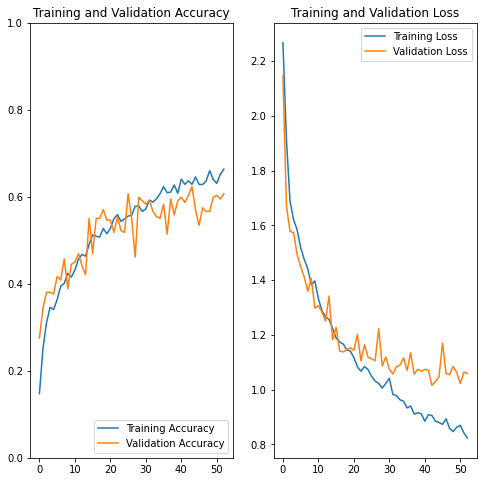

In [113]:
from matplotlib import pyplot as plt

history = best_history

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# because of early stopping, can't just use "epochs"
epochs_range = range(len(history.history['loss']))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylim([0, 1])

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Evaluate on test data

In [123]:
model = create_model(num_classes=num_classes)
model.load_weights("./ckpt/10_class_lr0005/val_acc_0.599.hdf5")

loss, acc = model.evaluate(test_examples, test_labels)

print('\nevaluate on test set:\nloss = {:.5f}\tacc = {:.3f}%'.format(loss, acc*100))

12/14 [========================>.....] - ETA: 0s - loss: 1.0669 - accuracy: 0.5677

2022-04-23 22:12:53.128250: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 12ms/step - loss: 1.0712 - accuracy: 0.5596

evaluate on test set:
loss = 1.07115	acc = 55.963%


In [126]:
%reset -f